In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.tree import export_graphviz

# Acquire

In [2]:
df = pd.read_csv('Austin Bicycle Crashes 2010-2017.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Adjusted Average Daily Traffic Amount,Agency,At Intersection Flag,Average Daily Traffic Amount,Average Daily Traffic Year,Case ID,City,Construction Zone Flag,Construction Zone Workers Present Flag,County,Crash Death Count,Crash Incapacitating Injury Count,Crash Non-incapacitating Injury Count,Crash Not Injured Count,Crash Possible Injury Count,Crash Severity,Crash Time,Crash Total Injury Count,Crash Unknown Injury Count,Crash Year,Day of Week,First Harmful Event,Highway System,Intersecting Street Name,Intersection Related,Latitude,Light Condition,Longitude,Manner of Collision,Number of Lanes,Other Factor,Outside Shoulder Width on Divided Highway,Physical Feature 1,Population Group,Private Drive Flag,Property Damages,Right of Way Usual Width,Road Class,Roadway Alignment,Roadway Part,Roadway Relation,Roadway Type,Speed Limit,Street Name,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,Person Type
0,11243623,No,No,15262,Austin Police Department,False,15262,2014,100010723,Austin,No,No,Travis,0,1,0,0,0,Incapacitating Injury,239,1,1,2010,Friday,Pedalcyclist,Farm To Market,NaN,Non Intersection,30.28608823,"Dark, Lighted",-97.6805777,One Motor Vehicle - Going Straight,4,Not Applicable,0,Not Applicable,"250,000 Pop And Over",No,NONE,100,Farm To Market,"Straight, Hillcrest",Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45,FM0969,4716,Dry,Marked Lanes,Clear,"Worn, Damaged",Pedalcyclist
1,12112069,No,No,No Data,Austin Police Department,False,No Data,No Data,100010834,Austin,No,No,Travis,0,0,2,1,0,Non-Incapacitating Injury,310,2,1,2010,Friday,Pedalcyclist,No Data,NaN,Non Intersection,30.25524478,"Dark, Lighted",-97.74505246,One Motor Vehicle - Going Straight,No Data,Not Applicable,No Data,Not Applicable,"250,000 Pop And Over",No,NONE,No Data,City Street,"Straight, Level",Main/Proper Lane,On Roadway,No Data,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,Pedalcyclist
2,12112069,No,No,No Data,Austin Police Department,False,No Data,No Data,100010834,Austin,No,No,Travis,0,0,2,1,0,Non-Incapacitating Injury,310,2,1,2010,Friday,Pedalcyclist,No Data,NaN,Non Intersection,30.25524478,"Dark, Lighted",-97.74505246,One Motor Vehicle - Going Straight,No Data,Not Applicable,No Data,Not Applicable,"250,000 Pop And Over",No,NONE,No Data,City Street,"Straight, Level",Main/Proper Lane,On Roadway,No Data,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,Pedalcyclist
3,12112069,No,No,No Data,Austin Police Department,False,No Data,No Data,100010834,Austin,No,No,Travis,0,0,2,1,0,Non-Incapacitating Injury,310,2,1,2010,Friday,Pedalcyclist,No Data,NaN,Non Intersection,30.25524478,"Dark, Lighted",-97.74505246,One Motor Vehicle - Going Straight,No Data,Not Applicable,No Data,Not Applicable,"250,000 Pop And Over",No,NONE,No Data,City Street,"Straight, Level",Main/Proper Lane,On Roadway,No Data,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,Pedalcyclist
4,11376123,No,No,22775,Austin Police Department,False,22775,2014,100042009,Austin,No,No,Travis,0,0,1,1,0,Non-Incapacitating Injury,2300,1,0,2010,Monday,Pedalcyclist,State Loop,E 16TH ST,Intersection Related,30.27959299,"Dark, Not Lighted",-97.70207457,One Motor Vehicle - Going Straight,4,Not Applicable,2,Not Applicable,"250,000 Pop And Over",No,NONE,160,US & State Highways,"Straight, Level",Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45,SL0111,1487,Dry,None,Clear,Not Worn,Pedalcyclist


In [6]:
df.size

130751

In [8]:
df.shape

(2467, 53)

In [7]:
for col in df.columns:
    print(col)
    print('Unique values:', df[col].nunique())
    print()
    print('Datatype:', df[col].dtype)
    print()
    print(df[col].value_counts())
    print('|--------------------|')
    print('|--------------------|')
    print('|--------------------|')

Crash ID
Unique values: 2374

Datatype: int64

12470025    16
12919603     4
12195628     4
12077374     4
13079200     4
            ..
13061976     1
12011562     1
11983486     1
15948412     1
14012416     1
Name: Crash ID, Length: 2374, dtype: int64
|--------------------|
|--------------------|
|--------------------|
$1000 Damage to Any One Person's Property
Unique values: 2

Datatype: object

No     1738
Yes     729
Name: $1000 Damage to Any One Person's Property, dtype: int64
|--------------------|
|--------------------|
|--------------------|
Active School Zone Flag
Unique values: 2

Datatype: object

No     2464
Yes       3
Name: Active School Zone Flag, dtype: int64
|--------------------|
|--------------------|
|--------------------|
Adjusted Average Daily Traffic Amount
Unique values: 79

Datatype: object

No Data    2143
34215        29
33647        26
148494       21
44866        12
           ... 
18049         1
49720         1
24711         1
118571        1
51598      

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crash ID,2467.0,1.363072e+07,1.362193e+06,11167757.0,12470025.0,13537694.0,14735840.5,16142780.0
Crash Death Count,2467.0,6.485610e-03,8.028798e-02,0.0,0.0,0.0,0.0,1.0
Crash Incapacitating Injury Count,2467.0,1.917308e-01,1.161059e+00,0.0,0.0,0.0,0.0,14.0
Crash Non-incapacitating Injury Count,2467.0,6.364005e-01,5.648717e-01,0.0,0.0,1.0,1.0,4.0
Crash Not Injured Count,2467.0,1.208350e+00,9.317566e-01,0.0,1.0,1.0,1.0,9.0
Crash Possible Injury Count,2467.0,2.622619e-01,4.863575e-01,0.0,0.0,0.0,0.0,5.0
Crash Time,2467.0,1.405577e+03,5.589722e+02,1.0,1008.0,1533.0,1823.0,2358.0
Crash Total Injury Count,2467.0,1.090393e+00,1.208050e+00,0.0,1.0,1.0,1.0,15.0
Crash Unknown Injury Count,2467.0,1.588974e-01,4.164657e-01,0.0,0.0,0.0,0.0,4.0
Crash Year,2467.0,2.013407e+03,2.249557e+00,2010.0,2011.0,2013.0,2015.0,2017.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Crash ID                                   2467 non-null   int64 
 1   $1000 Damage to Any One Person's Property  2467 non-null   object
 2   Active School Zone Flag                    2467 non-null   object
 3   Adjusted Average Daily Traffic Amount      2467 non-null   object
 4   Agency                                     2467 non-null   object
 5   At Intersection Flag                       2467 non-null   bool  
 6   Average Daily Traffic Amount               2467 non-null   object
 7   Average Daily Traffic Year                 2467 non-null   object
 8   Case ID                                    2432 non-null   object
 9   City                                       2467 non-null   object
 10  Construction Zone Flag              

In [11]:
def df_info(df):
    print(df.info())
    print()
    print(df.size, df.shape)
    print()
    print(df.isnull().sum())
    print()
    for col in df.columns:
        print(col)
        print('Unique values:', df[col].nunique())
        print()
        print('Datatype:', df[col].dtype)
        print()
        print(df[col].value_counts())
        print('|--------------------|')
        print('|--------------------|')
        print('|--------------------|')
    return df.describe().T

In [12]:
df_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Crash ID                                   2467 non-null   int64 
 1   $1000 Damage to Any One Person's Property  2467 non-null   object
 2   Active School Zone Flag                    2467 non-null   object
 3   Adjusted Average Daily Traffic Amount      2467 non-null   object
 4   Agency                                     2467 non-null   object
 5   At Intersection Flag                       2467 non-null   bool  
 6   Average Daily Traffic Amount               2467 non-null   object
 7   Average Daily Traffic Year                 2467 non-null   object
 8   Case ID                                    2432 non-null   object
 9   City                                       2467 non-null   object
 10  Construction Zone Flag              

,count,mean,std,min,25%,50%,75%,max
Crash ID,2467.0,1.363072e+07,1.362193e+06,11167757.0,12470025.0,13537694.0,14735840.5,16142780.0
Crash Death Count,2467.0,6.485610e-03,8.028798e-02,0.0,0.0,0.0,0.0,1.0
Crash Incapacitating Injury Count,2467.0,1.917308e-01,1.161059e+00,0.0,0.0,0.0,0.0,14.0
Crash Non-incapacitating Injury Count,2467.0,6.364005e-01,5.648717e-01,0.0,0.0,1.0,1.0,4.0
Crash Not Injured Count,2467.0,1.208350e+00,9.317566e-01,0.0,1.0,1.0,1.0,9.0
Crash Possible Injury Count,2467.0,2.622619e-01,4.863575e-01,0.0,0.0,0.0,0.0,5.0
Crash Time,2467.0,1.405577e+03,5.589722e+02,1.0,1008.0,1533.0,1823.0,2358.0
Crash Total Injury Count,2467.0,1.090393e+00,1.208050e+00,0.0,1.0,1.0,1.0,15.0
Crash Unknown Injury Count,2467.0,1.588974e-01,4.164657e-01,0.0,0.0,0.0,0.0,4.0
Crash Year,2467.0,2.013407e+03,2.249557e+00,2010.0,2011.0,2013.0,2015.0,2017.0


Takeaways
- Column names will need to be changed
- Case ID and Crash ID have duplicates
- Some columns have 'No Data' as an entry, may need to be dropped
- For classifying the data, I will bin 'Crash Severity' since some values don't have more than 

# Prep

In [13]:
df.head(3)

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Adjusted Average Daily Traffic Amount,Agency,At Intersection Flag,Average Daily Traffic Amount,Average Daily Traffic Year,Case ID,City,Construction Zone Flag,Construction Zone Workers Present Flag,County,Crash Death Count,Crash Incapacitating Injury Count,Crash Non-incapacitating Injury Count,Crash Not Injured Count,Crash Possible Injury Count,Crash Severity,Crash Time,Crash Total Injury Count,Crash Unknown Injury Count,Crash Year,Day of Week,First Harmful Event,Highway System,Intersecting Street Name,Intersection Related,Latitude,Light Condition,Longitude,Manner of Collision,Number of Lanes,Other Factor,Outside Shoulder Width on Divided Highway,Physical Feature 1,Population Group,Private Drive Flag,Property Damages,Right of Way Usual Width,Road Class,Roadway Alignment,Roadway Part,Roadway Relation,Roadway Type,Speed Limit,Street Name,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,Person Type
0,11243623,No,No,15262,Austin Police Department,False,15262,2014,100010723,Austin,No,No,Travis,0,1,0,0,0,Incapacitating Injury,239,1,1,2010,Friday,Pedalcyclist,Farm To Market,NaN,Non Intersection,30.28608823,"Dark, Lighted",-97.6805777,One Motor Vehicle - Going Straight,4,Not Applicable,0,Not Applicable,"250,000 Pop And Over",No,NONE,100,Farm To Market,"Straight, Hillcrest",Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45,FM0969,4716,Dry,Marked Lanes,Clear,"Worn, Damaged",Pedalcyclist
1,12112069,No,No,No Data,Austin Police Department,False,No Data,No Data,100010834,Austin,No,No,Travis,0,0,2,1,0,Non-Incapacitating Injury,310,2,1,2010,Friday,Pedalcyclist,No Data,NaN,Non Intersection,30.25524478,"Dark, Lighted",-97.74505246,One Motor Vehicle - Going Straight,No Data,Not Applicable,No Data,Not Applicable,"250,000 Pop And Over",No,NONE,No Data,City Street,"Straight, Level",Main/Proper Lane,On Roadway,No Data,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,Pedalcyclist
2,12112069,No,No,No Data,Austin Police Department,False,No Data,No Data,100010834,Austin,No,No,Travis,0,0,2,1,0,Non-Incapacitating Injury,310,2,1,2010,Friday,Pedalcyclist,No Data,NaN,Non Intersection,30.25524478,"Dark, Lighted",-97.74505246,One Motor Vehicle - Going Straight,No Data,Not Applicable,No Data,Not Applicable,"250,000 Pop And Over",No,NONE,No Data,City Street,"Straight, Level",Main/Proper Lane,On Roadway,No Data,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,Pedalcyclist


In [14]:
# Drop duplicates
df.drop_duplicates('Crash ID', inplace=True)

In [15]:
df.drop_duplicates('Case ID', inplace=True)

In [16]:
for col in ['Case ID', 'Crash ID']:
    print(df[col].isnull().sum())

1
0


In [17]:
df[df['Case ID'].isnull()]

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Adjusted Average Daily Traffic Amount,Agency,At Intersection Flag,Average Daily Traffic Amount,Average Daily Traffic Year,Case ID,City,Construction Zone Flag,Construction Zone Workers Present Flag,County,Crash Death Count,Crash Incapacitating Injury Count,Crash Non-incapacitating Injury Count,Crash Not Injured Count,Crash Possible Injury Count,Crash Severity,Crash Time,Crash Total Injury Count,Crash Unknown Injury Count,Crash Year,Day of Week,First Harmful Event,Highway System,Intersecting Street Name,Intersection Related,Latitude,Light Condition,Longitude,Manner of Collision,Number of Lanes,Other Factor,Outside Shoulder Width on Divided Highway,Physical Feature 1,Population Group,Private Drive Flag,Property Damages,Right of Way Usual Width,Road Class,Roadway Alignment,Roadway Part,Roadway Relation,Roadway Type,Speed Limit,Street Name,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,Person Type
35,11464818,Yes,No,No Data,Austin Police Department,True,No Data,No Data,NaN,Austin,No,No,Travis,0,0,2,1,0,Non-Incapacitating Injury,1737,2,0,2010,Wednesday,Motor Vehicle In Transport,No Data,RIO GRANDE ST,Intersection,30.27877478,Daylight,-97.74619246,Opposite Direction - One Straight-One Left Turn,No Data,Not Applicable,No Data,Not Applicable,"250,000 Pop And Over",No,NONE,No Data,City Street,"Straight, Grade",Main/Proper Lane,On Roadway,No Data,30,W 15TH ST,NO DATA,Dry,Signal Light,Clear,Not Worn,Pedalcyclist


In [18]:
for col in df.columns:
    df.rename(columns={col:col.replace(" ", "_")}, inplace=True)
df

,Crash_ID,$1000_Damage_to_Any_One_Person's_Property,Active_School_Zone_Flag,Adjusted_Average_Daily_Traffic_Amount,Agency,At_Intersection_Flag,Average_Daily_Traffic_Amount,Average_Daily_Traffic_Year,Case_ID,City,Construction_Zone_Flag,Construction_Zone_Workers_Present_Flag,County,Crash_Death_Count,Crash_Incapacitating_Injury_Count,Crash_Non-incapacitating_Injury_Count,Crash_Not_Injured_Count,Crash_Possible_Injury_Count,Crash_Severity,Crash_Time,Crash_Total_Injury_Count,Crash_Unknown_Injury_Count,Crash_Year,Day_of_Week,First_Harmful_Event,Highway_System,Intersecting_Street_Name,Intersection_Related,Latitude,Light_Condition,Longitude,Manner_of_Collision,Number_of_Lanes,Other_Factor,Outside_Shoulder_Width_on_Divided_Highway,Physical_Feature_1,Population_Group,Private_Drive_Flag,Property_Damages,Right_of_Way_Usual_Width,Road_Class,Roadway_Alignment,Roadway_Part,Roadway_Relation,Roadway_Type,Speed_Limit,Street_Name,Street_Number,Surface_Condition,Traffic_Control_Type,Weather_Condition,Person_Helmet,Person_Type
0,11243623,No,No,15262,Austin Police Department,False,15262,2014,100010723,Austin,No,No,Travis,0,1,0,0,0,Incapacitating Injury,239,1,1,2010,Friday,Pedalcyclist,Farm To Market,NaN,Non Intersection,30.28608823,"Dark, Lighted",-97.6805777,One Motor Vehicle - Going Straight,4,Not Applicable,0,Not Applicable,"250,000 Pop And Over",No,NONE,100,Farm To Market,"Straight, Hillcrest",Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45,FM0969,4716,Dry,Marked Lanes,Clear,"Worn, Damaged",Pedalcyclist
1,12112069,No,No,No Data,Austin Police Department,False,No Data,No Data,100010834,Austin,No,No,Travis,0,0,2,1,0,Non-Incapacitating Injury,310,2,1,2010,Friday,Pedalcyclist,No Data,NaN,Non Intersection,30.25524478,"Dark, Lighted",-97.74505246,One Motor Vehicle - Going Straight,No Data,Not Applicable,No Data,Not Applicable,"250,000 Pop And Over",No,NONE,No Data,City Street,"Straight, Level",Main/Proper Lane,On Roadway,No Data,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,Pedalcyclist
4,11376123,No,No,22775,Austin Police Department,False,22775,2014,100042009,Austin,No,No,Travis,0,0,1,1,0,Non-Incapacitating Injury,2300,1,0,2010,Monday,Pedalcyclist,State Loop,E 16TH ST,Intersection Related,30.27959299,"Dark, Not Lighted",-97.70207457,One Motor Vehicle - Going Straight,4,Not Applicable,2,Not Applicable,"250,000 Pop And Over",No,NONE,160,US & State Highways,"Straight, Level",Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45,SL0111,1487,Dry,None,Clear,Not Worn,Pedalcyclist
5,11243620,No,No,No Data,Austin Police Department,True,No Data,No Data,10-0061060,Austin,No,No,Travis,0,0,1,1,0,Non-Incapacitating Injury,1408,1,0,2010,Wednesday,Pedalcyclist,State Loop,NaN,Driveway Access,No Data,Daylight,No Data,One Motor Vehicle - Turning Left,No Data,One Vehicle Leaving Driveway,No Data,Entrance To Or Exit From Private Property Or D...,"250,000 Pop And Over",No,NONE,No Data,US & State Highways,"Straight, Grade",Main/Proper Lane,On Roadway,No Data,0,SL0343,NO DATA,Wet,Signal Light,Rain,Not Worn,Pedalcyclist
6,11318193,No,No,No Data,Austin Police Department,False,No Data,No Data,10-0071356,Austin,No,No,Travis,0,0,1,2,0,Non-Incapacitating Injury,1715,1,0,2010,Thursday,Pedalcyclist,No Data,GUADALUPE ST,Intersection Related,30.28157205,Daylight,-97.74142165,One Motor Vehicle - Going Straight,No Data,Not Applicable,No Data,Not Applicable,"250,000 Pop And Over",No,NONE,No Data,City Street,"Straight, Grade",Main/Proper Lane,On Roadway,No Data,35,W MARTIN LUTHER KING JR BLVD,398,Dry,Marked Lanes,Clear,"Worn, Unk Damage",Pedalcyclist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,16127795,No,No,No Data,Austin Police Department,True,No Data,No Data,173390874,Austin,No,No,Travis,0,0,1,1,0,Non-Incapacitating Injury,1254,1,0,2017,Tuesday,Pedalcyclist,No Data,W NORTH LOOP 

In [25]:
x = []
for col in df.columns:
    if df[df[col]=="No Data"].shape[0] > 0:
        x.append(col)

In [26]:
x

['Adjusted_Average_Daily_Traffic_Amount',
 'Average_Daily_Traffic_Amount',
 'Average_Daily_Traffic_Year',
 'Highway_System',
 'Latitude',
 'Longitude',
 'Number_of_Lanes',
 'Outside_Shoulder_Width_on_Divided_Highway',
 'Property_Damages',
 'Right_of_Way_Usual_Width',
 'Roadway_Type']

In [31]:
for col in x:
    print(df[col].value_counts())

No Data    2027
34215        28
33647        26
148494       16
44866        12
           ... 
55791         1
20818         1
23804         1
27085         1
51598         1
Name: Adjusted_Average_Daily_Traffic_Amount, Length: 79, dtype: int64
No Data    1998
34215        30
33647        29
148494       19
44866        13
           ... 
29344         1
18049         1
49720         1
141120        1
51598         1
Name: Average_Daily_Traffic_Amount, Length: 81, dtype: int64
No Data    2027
2014        309
Name: Average_Daily_Traffic_Year, dtype: int64
No Data           1969
State Loop         155
Interstate          85
US Highway          53
Farm To Market      40
Ranch To Mkt        17
State Highway       13
State Spur           4
Name: Highway_System, dtype: int64
No Data        239
30.26339563     10
30.30274477      9
30.22964479      8
30.28978477      7
              ... 
30.26578478      1
30.1781348       1
30.28686478      1
30.26204701      1
30.33342436      1
Name: Lati

In [36]:
df[df.Property_Damages=='No Data']

,Crash_ID,$1000_Damage_to_Any_One_Person's_Property,Active_School_Zone_Flag,Adjusted_Average_Daily_Traffic_Amount,Agency,At_Intersection_Flag,Average_Daily_Traffic_Amount,Average_Daily_Traffic_Year,Case_ID,City,Construction_Zone_Flag,Construction_Zone_Workers_Present_Flag,County,Crash_Death_Count,Crash_Incapacitating_Injury_Count,Crash_Non-incapacitating_Injury_Count,Crash_Not_Injured_Count,Crash_Possible_Injury_Count,Crash_Severity,Crash_Time,Crash_Total_Injury_Count,Crash_Unknown_Injury_Count,Crash_Year,Day_of_Week,First_Harmful_Event,Highway_System,Intersecting_Street_Name,Intersection_Related,Latitude,Light_Condition,Longitude,Manner_of_Collision,Number_of_Lanes,Other_Factor,Outside_Shoulder_Width_on_Divided_Highway,Physical_Feature_1,Population_Group,Private_Drive_Flag,Property_Damages,Right_of_Way_Usual_Width,Road_Class,Roadway_Alignment,Roadway_Part,Roadway_Relation,Roadway_Type,Speed_Limit,Street_Name,Street_Number,Surface_Condition,Traffic_Control_Type,Weather_Condition,Person_Helmet,Person_Type
1306,13653661,Yes,No,No Data,Austin Police Department,True,No Data,No Data,140011642,Austin,No,No,Travis,0,0,1,1,0,Non-Incapacitating Injury,1533,1,0,2014,Wednesday,Pedalcyclist,No Data,WOODWARD ST,Intersection Related,30.22964479,Daylight,-97.76025246,One Motor Vehicle - Turning Right,No Data,Attention Diverted From Driving,No Data,Not Applicable,"250,000 Pop And Over",No,No Data,No Data,City Street,"Straight, Level",Main/Proper Lane,On Roadway,No Data,-1,S CONGRESS AVE,3401,Dry,Signal Light,Clear,Not Worn,Pedalcyclist
1307,13652693,No,No,No Data,Austin Police Department,True,No Data,No Data,140030986,Austin,No,No,Travis,0,0,0,1,1,Possible Injury,1358,1,0,2014,Friday,Pedalcyclist,No Data,BROADMOOR DR,Intersection,30.30631477,Daylight,-97.69734247,One Motor Vehicle - Turning Left,No Data,Vision Obstructed By Headlight Or Sun Glare,No Data,Not Applicable,"250,000 Pop And Over",No,No Data,No Data,City Street,"Straight, Hillcrest",Main/Proper Lane,On Roadway,No Data,-1,BERKMAN DR,5299,Dry,Crosswalk,Clear,"Worn, Not Damaged",Pedalcyclist
1308,13650620,No,No,No Data,Austin Police Department,True,No Data,No Data,140040724,Austin,No,No,Travis,0,0,1,1,0,Non-Incapacitating Injury,1129,1,0,2014,Saturday,Pedalcyclist,No Data,BRISTOL DR,Intersection,30.31350477,Daylight,-97.68239248,One Motor Vehicle - Going Straight,No Data,Not Applicable,No Data,Not Applicable,"250,000 Pop And Over",No,No Data,No Data,City Street,"Curve, Level",Main/Proper Lane,On Roadway,No Data,30,N HAMPTON DR,6311,Dry,Stop Sign,Clear,Unknown If Worn,Pedalcyclist
1309,13658963,No,No,No Data,Austin Police Department,True,No Data,No Data,140061204,Austin,No,No,Travis,0,0,1,2,0,Non-Incapacitating Injury,1811,1,0,2014,Monday,Pedalcyclist,No Data,UNKNOWN,Intersection,30.36119554,"Dark, Lighted",-97.76571624,One Motor Vehicle - Going Straight,No Data,Attention Diverted From Driving,No Data,Not Applicable,"250,000 Pop And Over",No,No Data,No Data,City Street,"Straight, Level",Main/Proper Lane,On Roadway,No Data,-1,CIRCLETREE LOOP,4197,Dry,Marked Lanes,Clear,Not Worn,Pedalcyclist
1310,13652787,No,No,No Data,Austin Police Department,False,44866,No Data,140070707,Austin,No,No,Travis,0,0,1,1,0,Non-Incapacitating Injury,1224,1,0,2014,Tuesday,Pedalcyclist,State Loop,NaN,Driveway Access,30.36969741,Daylight,-97.78802217,One Motor Vehicle - Turning Right,4,One Vehicle Leaving Driveway,10,Entrance To Or Exit From Private Property Or D...,"250,000 Pop And Over",No,No Data,291,US & State Highways,"Straight, Grade",Main/Proper Lane,On Roadway,"4 Or More Lanes, Divided",55,SL0360,NO DATA,Dry,None,Clear,"Worn, Not Damaged",Pedalcyclist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,14194950,No,No,No Data,Austin Police Department,False,No Data,No Data,143521154,Austin,No,No,Travis,0,0,1,0,0,Non-Incapacitating Injury,90

In [37]:
df = df[(df.Longitude!='No Data') | (df.Latitude!='No Data')]

In [38]:
df.isnull().sum()

Crash_ID                                       0
$1000_Damage_to_Any_One_Person's_Property      0
Active_School_Zone_Flag                        0
Adjusted_Average_Daily_Traffic_Amount          0
Agency                                         0
At_Intersection_Flag                           0
Average_Daily_Traffic_Amount                   0
Average_Daily_Traffic_Year                     0
Case_ID                                        1
City                                           0
Construction_Zone_Flag                         0
Construction_Zone_Workers_Present_Flag         0
County                                         0
Crash_Death_Count                              0
Crash_Incapacitating_Injury_Count              0
Crash_Non-incapacitating_Injury_Count          0
Crash_Not_Injured_Count                        0
Crash_Possible_Injury_Count                    0
Crash_Severity                                 0
Crash_Time                                     0
Crash_Total_Injury_C

In [39]:
def plot_dist(quant_vars, cat_vars):
    '''
    Function loops through all columns and plot each distribution.
    '''
    for col in df.drop(columns=['Longitude', 'Latitude']).columns:
        plt.title(f'Histogram for {col}')
        sns.histplot(x=df[col], hue=df['Crash_Severity'], bins=10)
        plt.tight_layout()
        plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

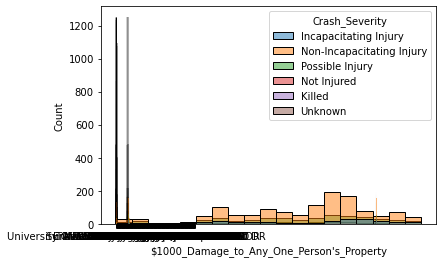

In [45]:
for col in df.drop(columns=['Crash_Severity', 'Case_ID', 'Crash_ID']).columns:
    sns.histplot(x=df[col], hue=df['Crash_Severity'])

In [ ]:
plot_dist(quant_vars, cat_vars)

In [ ]:
=df.drop(columns=['Intersecting_Street_Name', 
                 'Case_ID', 
                 'Crash_ID', 
                 'Active_School_Zone_Flag', 
                 'City', 
                 'County', 
                 'Population_Group', 
                 'Private_Drive_Flag', 
                 'Person_Type',
                 'Agency', 
                 'Street_Name',
                 'Street_Number', 
                 'Other_Factor',
                 'First_Harmful_Event',
                 'Physical_Feature_1', 
                 'Crash_Death_Count',
                 'Crash_Incapacitating_Injury_Count',
                 'Crash_Non-incapacitating_Injury_Count', 
                 'Crash_Not_Injured_Count',
                 'Crash_Possible_Injury_Count', 
                 'Traffic_Control_Type']
        , inplace=True)

In [ ]:
df.head(3)

In [ ]:
df.rename(columns={"$1000_Damage_to_Any_One_Person's_Property" : "one-k_prop_dmg",
                   "At_Intersection_Flag": "at_inter",
                   "Construction_Zone_Flag": "con_zone",
                   "Construction_Zone_Workers_Present_Flag": "con_workers_pres",
                   "Crash_Possible_Injury_Count": "poss_injured_count", 
                   "Crash_Time": "time", 
                   "Crash_Total_Injury_Count": "total_injured",
                   "Crash_Unknown_Injury_Count": 'unknown_inj_count',
                   "Crash_Year": "year",
                   "Day_of_Week": "day",
                   "Intersection_Related": "inter_related",
                   "Light_Condition": "light_condition",
                   "Manner_of_Collision": "coll_type",
                  }, inplace=True)

In [ ]:
for col in df.columns:
    print(df[col].value_counts())
    print()

In [ ]:
dummy_df = pd.get_dummies(df[["day",
                              "inter_related",
                              "light_condition",
                              "coll_type",
                              "Road_Class",
                              "Roadway_Alignment",
                              "Roadway_Part",
                              "Roadway_Relation",
                              "Surface_Condition",
                              "Weather_Condition",
                              "Person_Helmet",
                             ]], dummy_na=False, drop_first=False)
dummy_df.head()

In [ ]:
df = pd.concat([df.drop(columns=["day",
                              "inter_related",
                              "light_condition",
                              "coll_type",
                              "Road_Class",
                              "Roadway_Alignment",
                              "Roadway_Part",
                              "Roadway_Relation",
                              "Surface_Condition",
                              "Weather_Condition",
                              "Person_Helmet",
                             ]), dummy_df], axis=1)

In [ ]:
df.replace({'one-k_prop_dmg': {'No': 0, 'Yes': 1},
            'at_inter': {False: 0, True: 1},
            'con_zone': {'No': 0, 'Yes': 1},
            'con_workers_pres': {'No': 0, 'Yes': 1}
           }, inplace=True)

In [ ]:
df.head(3)

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df.Crash_Severity)

In [ ]:
df.replace({'Crash Severity': {'Non-Incapacitating Injury': 0, 
                               'Possible Injury': 0, 
                               'Not Injured': 0,
                               'Incapacitating Injury': 1,
                               'Killed': 1},
            }, inplace=True)

In [ ]:
df = df[df['Crash Severity'] != 'Unknown']

In [ ]:
df = df.reset_index()
df = df.drop(columns='index')

In [ ]:
df

In [ ]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test
train, validate, test = train_validate_test_split(df, 'Crash_Severity', seed=123)

In [ ]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

In [ ]:
train

In [ ]:
def explore_univariate(train, cat_vars, quant_vars):
    for var in cat_vars:
        explore_univariate_categorical(train, var)
        print('_________________________________________________________________')
    for col in quant_vars:
        p, descriptive_stats = explore_univariate_quant(train, col)
        plt.show(p)
        print(descriptive_stats)

def explore_bivariate(train, target, cat_vars, quant_vars):
    for cat in cat_vars:
        explore_bivariate_categorical(train, target, cat)
    for quant in quant_vars:
        explore_bivariate_quant(train, target, quant)

def explore_multivariate(train, target, cat_vars, quant_vars):
    '''
    '''
    plot_swarm_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    violin = plot_violin_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    pair = sns.pairplot(data=train, vars=quant_vars, hue=target)
    plt.show()
    plot_all_continuous_vars(train, target, quant_vars)
    plt.show()    


### Univariate

def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='lightseagreen')
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='lightseagreen')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats

def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table


#### Bivariate

def explore_bivariate_categorical(train, target, cat_var):
    '''
    takes in categorical variable and binary target variable, 
    returns a crosstab of frequencies
    runs a chi-square test for the proportions
    and creates a barplot, adding a horizontal line of the overall rate of the target. 
    '''
    print(cat_var, "\n_____________________\n")
    ct = pd.crosstab(train[cat_var], train[target], margins=True)
    chi2_summary, observed, expected = run_chi2(train, cat_var, target)
    p = plot_cat_by_target(train, target, cat_var)

    print(chi2_summary)
    print("\nobserved:\n", ct)
    print("\nexpected:\n", expected)
    plt.show(p)
    print("\n_____________________\n")

def explore_bivariate_quant(train, target, quant_var):
    '''
    descriptive stats by each target class. 
    compare means across 2 target groups 
    boxenplot of target x quant
    swarmplot of target x quant
    '''
    print(quant_var, "\n____________________\n")
    descriptive_stats = train.groupby(target)[quant_var].describe()
    average = train[quant_var].mean()
    mann_whitney = compare_means(train, target, quant_var)
    plt.figure(figsize=(4,4))
    boxen = plot_boxen(train, target, quant_var)
    swarm = plot_swarm(train, target, quant_var)
    plt.show()
    print(descriptive_stats, "\n")
    print("\nMann-Whitney Test:\n", mann_whitney)
    print("\n____________________\n")
    
## Bivariate Categorical

def run_chi2(train, cat_var, target):
    observed = pd.crosstab(train[cat_var], train[target])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    chi2_summary = pd.DataFrame({'chi2': [chi2], 'p-value': [p], 
                                 'degrees of freedom': [degf]})
    expected = pd.DataFrame(expected)
    return chi2_summary, observed, expected

def plot_cat_by_target(train, target, cat_var):
    p = plt.figure(figsize=(2,2))
    p = sns.barplot(cat_var, target, data=train, alpha=.8, color='lightseagreen')
    overall_rate = train[target].mean()
    p = plt.axhline(overall_rate, ls='--', color='gray')
    return p


## Bivariate Quant

def plot_swarm(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.swarmplot(data=train, x=target, y=quant_var, color='lightgray')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

def plot_boxen(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.boxenplot(data=train, x=target, y=quant_var, color='lightseagreen')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

# alt_hyp = ‘two-sided’, ‘less’, ‘greater’

def compare_means(train, target, quant_var, alt_hyp='two-sided'):
    x = train[train[target]==0][quant_var]
    y = train[train[target]==1][quant_var]
    return stats.mannwhitneyu(x, y, use_continuity=True, alternative=alt_hyp)


### Multivariate

def plot_all_continuous_vars(train, target, quant_vars):
    '''
    Melt the dataset to "long-form" representation
    boxenplot of measurement x value with color representing the target variable. 
    '''
    my_vars = [item for sublist in [quant_vars, [target]] for item in sublist]
    sns.set(style="whitegrid", palette="muted")
    melt = train[my_vars].melt(id_vars=target, var_name="measurement")
    plt.figure(figsize=(8,6))
    p = sns.boxenplot(x="measurement", y="value", hue=target, data=melt)
    p.set(yscale="log", xlabel='')    
    plt.show()

def plot_violin_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.violinplot(x=cat, y=quant, data=train, split=True, 
                           ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        plt.show()

def plot_swarm_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.swarmplot(x=cat, y=quant, data=train, ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        plt.show()


In [ ]:
for col in df.columns:
    print(col, df[col].nunique())

In [ ]:
explore_univariate(train, cat_vars, quant_vars)

Takeaways:
- Speed limit may be a factor
- Light condition looks like a factor
- Most happen on city streets
- straight and level roads
- riding on the road
- Dry conditions
- clear weather
- helmets!

# Exploration

Let's check out some of the prepare takeaways

In [ ]:
sns.histplot(x=train.Speed_Limit, hue=train.Crash_Severity)

In [ ]:
for col in df.columns:
    print(df[df['Speed Limit']<=10][col].value_counts())

In [ ]:
In [5]:
def plot_dist(quant_vars, cat_vars):
    '''
    Function loops through all columns and plot each distribution.
    '''
    for col in df.columns[1:]:
        plt.title(f'Histogram for {col}')
        sns.histplot(x=df[col], hue=df.churn, bins=10)
        plt.tight_layout()
        plt.show()